# Cross Validation
Cross validation is an important topic in the `Machine Learning` to ensure that our model is robust enough. Traditional training strategy is using 3 parts of the dataset for training, testing a validation.

* training set - is used to train the model and optimaze the hyperparameters of the model
* testing set - is used to evalutate that the model generalize enough to correctly work on data it was not trained on. However through the person doing the optimazation some knoweldge about the test set eventually leaks into the model.
* validation set - for that reason we use validation set which is used as the final check that model is able to generalize with previously unknown data.

Creating these sets limit the number of data which are used for the training and that can decrease the model's ability to learn. 

Cross validation allows to make a robust model by spliting the training data into `k` subsets. Each subsets uses part of it's data for training and part to test. Next subset uses different split of train and test data as you can see on the picture below. This is more intensive on the resources, but allow you to use mode data for training.

![alt text](Cross_Validation.jpg)

You can also be sure that your model is able to generalize, in case each of the fold has similar performace. If one (or more) fold is achieving really for score while others perform badly, you need to think more about the way how you split the data. You will see examples of this below. 

`Scikit Learn` is favorite python library to perform many machine learning operations and it brings many methods which helps to split the data into training, testing and validation set. The most popular which we will be discussing are: 

* train_test_split - creates single split into train and test set.
* Kfold - creates k-fold splits allowing cross validation
* StratifiedKFold - creates k-fold splits considering the distribution of the target variable
* cross_val_score - evaluta model's score through cross validation

You should be aware that cross-validation is however not suitable for all the occasions and you should think wisely how you split the data.

More about cross validaiton:
* https://scikit-learn.org/stable/modules/cross_validation.html
* https://en.wikipedia.org/wiki/Cross-validation_(statistics)

## Cross Validation

* Cross validation is an important topic in the Machine Learning to ensure that our model is robust enough to assess the generalization ability of a model. It helps ensure that the model does not overfit or underfit and provides a robust estimate of its performance on unseen data. 

* Traditional training strategy is using 3 parts of the dataset for training, testing a validation.

    * training set - is used to train the model and optimaze the hyperparameters of the model.
    * testing set - is used to evalutate that the model generalize enough to correctly work on data it was not trained on. However through the person doing the optimazation some knoweldge about the test set eventually leaks into the model.
    * validation set - for that reason we use validation set which is used as the final check that model is able to generalize with previously unknown data.

<div style="display: flex; justify-content: center;">
    <img src="dataset-split.PNG" alt="Sample Image" width="700">
</div>

* Creating these sets limit the number of data which are used for the training and that can decrease the model's ability to learn. 

* Cross validation allows to make a robust model by spliting the training data into k subsets. Each subsets uses part of it's data for training and part to test. 

* Next subset uses different split of train and test data as you can see on the picture below. This is more intensive on the resources, but allow you to use mode data for training.

<div style="display: flex; justify-content: center;">
    <img src="Cross_Validation.jpg" alt="Sample Image" width="700">
</div>

* You can also be sure that your model is able to generalize, in case each of the fold has similar performace. 

* If one (or more) fold is achieving really for score while others perform badly, you need to think more about the way how you split the data. You will see examples of this below.

* Need for Cross Validation: 

    * Machine Learning: 

        1. **Assessing generalization ability**: The primary purpose of cross validation is to estimate how well a model will perform on unseen data. By training and testing a model on different subsets of available data, cross validation provides a better estimate of the model's ability to generalize.

        2. **Reducing overfitting risk**: Models that perform exceptionally well on training data but poorly on unseen data are overfitted. Cross validation helps identify overfitting by measuring performance across multiple data splits.

        3. **Hyperparameter tuning**: Cross validation provides a systematic way to compare different model configurations and select optimal hyperparameters without contaminating the test set.

        4. **Handling limited data**: In scenarios with limited data, cross validation makes efficient use of the available samples by ensuring each data point is used for both training and validation.

        5. **Increasing result reliability**: By averaging model performance across multiple data splits, cross validation produces more robust and reliable performance estimates than a single train-test split.

    * For deep learning specifically, cross validation addresses additional challenges:

        - **High model variance**: Deep learning models often exhibit high variance due to their complexity and the stochastic nature of optimization algorithms. Cross validation helps quantify this variance.

        - **Computational expense**: While traditional k-fold cross validation may be computationally prohibitive for large deep learning models, modified approaches like holdout validation with multiple random splits can provide similar benefits.

        - **Architecture selection**: Cross validation helps compare different network architectures to identify the most effective design for a specific problem.

    * Cross validation is essential for building robust and reliable machine learning and deep learning models that perform well in real-world applications.


* **Scikit Learn** is favorite python library to perform many machine learning operations and it brings many methods which helps to split the data into training, testing and validation set. The most popular which we will review in this tutorial are:

    * train_test_split - creates single split into train and test set.
    * Kfold - creates k-fold splits allowing cross validation
    * StratifiedKFold - creates k-fold splits considering the distribution of the target variable
    * cross_val_score - evaluta model's score through cross validation


* Let's have a look at some real usecases. We will first split simple **range of 25 numbers** and then we will look at popular **Iris dataset** which uses petal and sepal measurements to predict which kind of Iris flower it is. 

In [57]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [58]:
# create the range 1 to 25
rn = range(1,26)

Let's start with the Kfold method which splits the train set into k-folds so that each sample is used once for testing and k-1 times for training. 

* **K-Fold Cross-Validation (Standard)**: 
    - K-Fold Cross-Validation is a technique that divides your dataset into K equally sized folds, then trains and validates your model K times. 
    - Each time, a different fold serves as the validation set while the remaining K-1 folds form the training set.

    * The key components of K-Fold Cross-Validation are:

        * **Dataset Splitting**: The entire dataset is divided into K equally sized folds.
        * **Iterative Training/Validation**: For each of the K folds:

            - The current fold becomes the validation set
            - The remaining K-1 folds become the training set
            - The model is trained and evaluated


        * **Performance Aggregation**: The K performance scores are averaged to get a more robust estimate of the model's performance.

    * Advantages of K-Fold Cross-Validation:

        - Efficient Use of Data: Each data point is used for both training and validation.
        - Robust Evaluation: Provides a more reliable estimate of model performance by averaging across multiple splits.
        - Reduces Variability: Minimizes the impact of data sampling on performance estimation.
        - Works Well with Small Datasets: Makes the most of limited data.
        - More Reliable Metrics: Provides a better estimate of model performance.

    * When to Use K-Fold Cross-Validation
        - You have a limited dataset
        - You want a more reliable estimate of model performance
        - You're comparing different models or hyperparameters
        - You need to understand the variability in model performance

In [59]:
# to demonstrate how the data are split, we will create 3 and 5 folds. 
# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [60]:
# the Kfold function retunrs the indices of the data. Our range goes from 1-25 so the index is 0-24
for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8 17 18 19 20 21 22 23 24] [ 9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18 19 20 21 22 23 24]


In [61]:
# to get the values from our data, we use np.take() to access a value at particular index
for train_index, test_index in kf3.split(rn):
    print(np.take(rn,train_index), np.take(rn,test_index))

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] [1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 18 19 20 21 22 23 24 25] [10 11 12 13 14 15 16 17]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19 20 21 22 23 24 25]


## Chart the cross validation split

In [62]:
# Let's split our test range into 5 and3  folds and display the splits on the chart.
# In order to clearly show which data belongs to each set, we will shift the values by -.1 and +.1
# the first fold will contain values 0.9 in train and 1.1 in the test set, second 1.9 and 2.1, etc.
# we will also give each sets the different color
# because we will repeat this exercise for the shuffled version, let's create a function 

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = pd.concat([train, train_df], ignore_index=True)
        
        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = pd.concat([test, test_df], ignore_index=True)
        
        i += 1
    return train, test

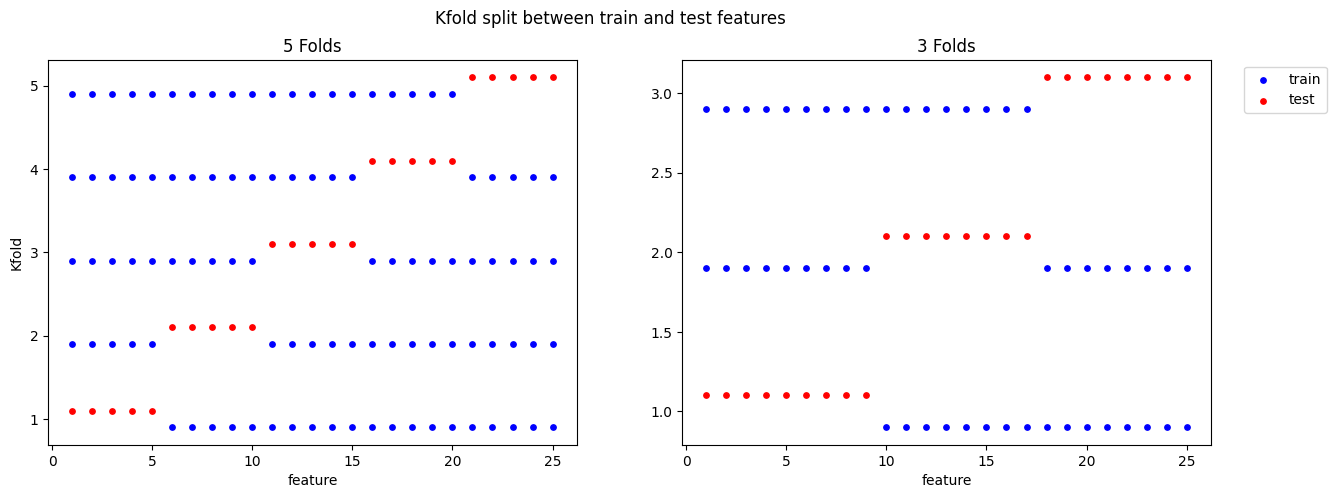

In [63]:
train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train3)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test3)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[1].set_xlabel("feature")
ax[0].set_title("5 Folds")
ax[1].set_title("3 Folds")
plt.suptitle("Kfold split between train and test features")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [64]:
# let's make sure how the values are distributes between the sets; Also we will create function so that we can repeat
def kfold_stats(df, name):
    s =  pd.Series({"Min value: ": df["x"].min(),
              "Max value: ": df["x"].max(),
              "Min occurance: ": df["x"].value_counts().min(),
              "Max occurance: ": df["x"].value_counts().max(),
               "Min lenght": df.groupby("val").count().min().values[0],
               "Max lenght": df.groupby("val").count().max().values[0]})
    s.name = name
    return s
pd.concat([kfold_stats(train5, "Train5"), kfold_stats(test5,"Test5"),
          kfold_stats(train3, "Train3"), kfold_stats(test3,"Test3")], 
          axis=1)

,Train5,Test5,Train3,Test3
Min value:,1,1,1,1
Max value:,25,25,25,25
Min occurance:,4,1,2,1
Max occurance:,4,1,2,1
Min lenght,20,5,16,8
Max lenght,20,5,17,9


The table above summarizes some key facts about the KFold:

* `Min and Max value` - both train and test cover all the features
* `Min and Max occurrence`- each value occurs once in the test set and k-1 times in the train set
* `Min and Max value length` - in case you have a number of features which is not dividable by n, some will have different split between test and train sets. E.g. in case of 25 features and 3 split the ratios as 16/9, 17/8, 17/8

## Shuffled KFold
* In the previous example, you have seen the unshuffled train/test distribution. Such distribution can influence the result of the machine learning model so it is often useful to split the features randomly in order to prove the abilities of your model. 
* A random split of the data is achieved by the `shuffle` parameter. `random-state` parameter initiates the randomizer the way that using the same random state ensures the same split.
* Shuffled K-Fold Cross-Validation is a variant of k-Fold Cross-Validation where the dataset is randomly shuffled before splitting into k subsets (folds). 
* This helps in breaking any inherent ordering in the data, leading to a more randomized and unbiased distribution of samples in each fold.

* Working:

    - **Data Shuffling**: Before creating any folds, the entire dataset is randomly shuffled.
    - **Fold Creation**: The shuffled dataset is then divided into K equal (or nearly equal) parts or "folds."
    - **Iterative Training and Testing**: For each of the K iterations:

        - One fold is selected as the validation (test) set
        - The remaining K-1 folds form the training set
        - A model is trained on the training set and evaluated on the validation set
        - The performance metric is recorded


    - **Final Evaluation**: After all iterations, the K performance metrics are averaged to produce a final estimate of model performance.

* Key Characteristics:

    - Random Data Distribution: Ensures each fold contains a representative mix of the data
    - Reduces Bias: Prevents systematic patterns in the data from affecting all folds similarly
    - Reproducibility: Uses a random seed to ensure the shuffling can be reproduced if needed
    - More Reliable Evaluation: Generally produces more stable and reliable performance estimates




In [65]:
kf42 = KFold(n_splits=5, shuffle=True, random_state=42)
kf123 = KFold(n_splits=5, shuffle=True, random_state=123)

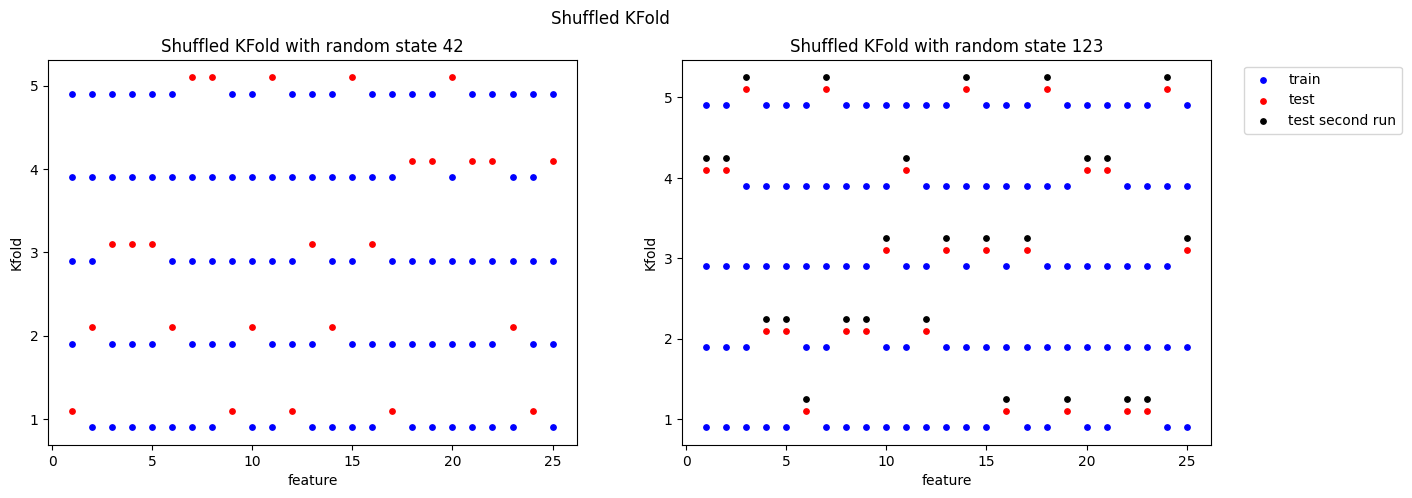

In [66]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(kf123,rn)
train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("Shuffled KFold with random state 123")
plt.suptitle("Shuffled KFold")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Kfold on the real dataset
Let's use the Kfold to evaluate a classification model on the popular Iris Dataset. It contains 150 mesaurement of petal and sepal sizes of the 3 varietals of Iris flower - setosa, versicolor and virginica. Each contains 50 measurement in the set. 

Iris dataset on scikit-learn: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [67]:
iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
features = iris['feature_names']
iris_df['target'] = iris.target
iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
69,5.6,2.5,3.9,1.1,1,versicolor
104,6.5,3.0,5.8,2.2,2,virginica
28,5.2,3.4,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
72,6.3,2.5,4.9,1.5,1,versicolor


In [68]:
# Let's see how many samples of each iris type we have in our set
pd.DataFrame(iris_df.groupby("target_name").size().reset_index()).rename(columns={0:"samples"})

,target_name,samples
0,setosa,50
1,versicolor,50
2,virginica,50


### Single fold
Let's perform logistics regression using traditional train_test_split which will split the data into train and test set, so that each target value appear in both training and testing set similar number of times. 

In [69]:
# initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

In [70]:
#Logistic regression without Kfold, just split into 80% train and 20% test set
X = iris_df[features]
y = iris_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [71]:
#Train the model
model.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, model.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, model.predict(X_test))]})

,Accurancy on Train,Accurancy on Test
0,0.958333,1.0


### KFold
Kfold method returns the order of the samples chosen for train and test sets in each fold. On a pandas dataframe we have use to .iloc function to get the correct rows. Because I haven't split the data into X (features) and y (target) I have to also use .loc, to choose the right columns (.loc[:,features]) or simply pick the columns (['target'])

In [72]:
i = 1
for train_index, test_index in kf3.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index][features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index]['target']
        
    #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}")
    i += 1

Accuracy for the fold no. 1 on the test set: 0.0
Accuracy for the fold no. 2 on the test set: 0.0
Accuracy for the fold no. 3 on the test set: 0.0


But why the accuracy is each fold **0.0**? The reason is the uniformity of the splits. Since the data are ordered that setosa appears on the first fifty rows of the dataset, followed by versicolor and virginica we have achieved unique distribution of the training set, that it doesn't contain any target expected in the test set. Most machine learning model cannot learn to clasify into a class which it has never seen.  Which is visible on the third split

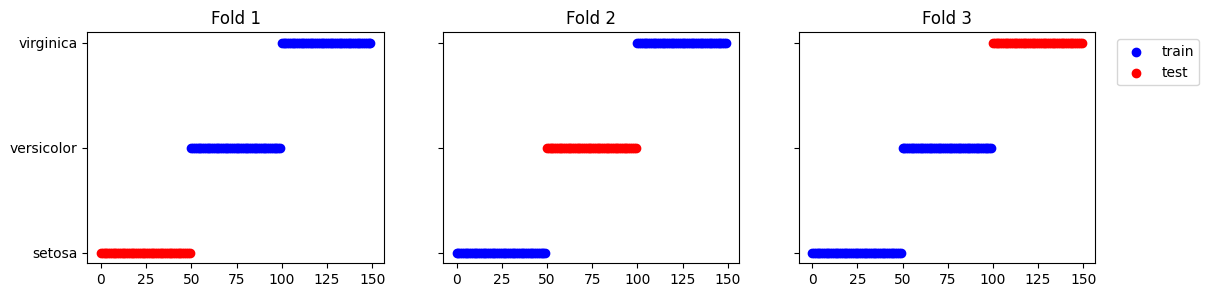

In [73]:
target_name = iris_df["target"]

fig, ax = plt.subplots(1,3, figsize=(13,3), sharey=True)
for i, (train_index, test_index) in enumerate(kf3.split(iris_df)):
    ax[i].scatter(x=train_index,y=target_name.iloc[train_index],label ="train", c='b')
    ax[i].scatter(x=test_index,y=target_name.iloc[test_index], label = "test", c='r')
    ax[i].set_title(f"Fold {i+1}")

ax[0].set_yticks([0,1,2])
ax[0].set_yticklabels(iris["target_names"])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Shuffled KFold
One way to get around this issue is to use the shuffled Kfold

In [74]:
dfs = []
kf = KFold(n_splits=3, shuffle=True, random_state=123)
i = 1

for train_index, test_index in kf.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']
    
    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

Accuracy for the fold no. 1 on the test set: 0.98
Accuracy for the fold no. 2 on the test set: 0.94
Accuracy for the fold no. 3 on the test set: 0.88


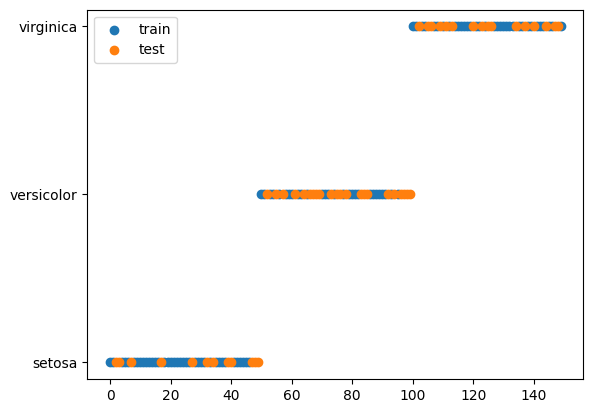

In [75]:
plt.scatter(x=y_train.index,y=iris_df.iloc[train_index].loc[:,'target_name'],label ="train")
plt.scatter(x=y_test.index,y=iris_df.iloc[test_index].loc[:,'target_name'], label = "test")
plt.legend()
plt.show()

You can see that now we pick samples from all three types of irises, however some are chosen more often than others. 

In [76]:
pd.concat(dfs,axis=1, sort=False)

,train 1,test 1,|,train 2,test 2,|,train 3,test 3,|
target_name,,,,,,,,,
versicolor,39,11,|,33,17,|,28,22,|
virginica,31,19,|,35,15,|,34,16,|
setosa,30,20,|,32,18,|,38,12,|


## Stratified KFold

* Stratified K-Fold cross-validation is a variation of K-Fold cross-validation specifically **designed to handle imbalanced datasets or to maintain the same class distribution across all folds**.
* It ensures that each fold in the cross-validation process maintains the same proportion of classes as the overall dataset.

<div style="display: flex; justify-content: center;">
    <img src="stratified-kfold-cross-validation.PNG" alt="Sample Image" width="700">
</div>

* The Problem with Imbalanced Classes:

    - In many classification problems, the classes are not evenly distributed. For example, in a medical diagnosis dataset, there might be far fewer cases of a rare disease than healthy individuals.

    - If you use standard K-Fold cross-validation on such datasets, it's possible that some folds might have a disproportionately high or low number of instances from a particular class. This can lead to biased model evaluation.

* Working:

    1. **Class Proportion Preservation**: The dataset is split into K folds while preserving the percentage of samples for each class.

    2. **Stratification Process**:

        - The algorithm first groups data points by their target classes
        - It then distributes samples from each class proportionally across all K folds
        - This ensures each fold has roughly the same proportion of each class as the original dataset

    3. **Cross-Validation Process**: Similar to regular K-Fold, each fold serves as a test set once while the remaining K-1 folds are used for training.

* Key Characteristics:

    - **Balanced Class Distribution**: Each fold maintains the same class distribution as the original dataset
    - **Reduced Bias**: Particularly important when classes are imbalanced
    - **More Reliable Evaluation**: Produces more consistent performance metrics across folds
    - **Applicable Only to Classification**: Used for classification problems, not for regression
    - **Accurate Evaluation**: Stratified K-Fold provides a more accurate and reliable estimate of the model's performance on imbalanced datasets.
    - **Improved Generalization**: By ensuring that each fold is representative of the overall dataset, it leads to better estimates of how well the model will generalize to unseen data.

* When to Use Stratified K-Fold:

    - Whenever you're working on a classification problem with imbalanced classes.
    - In most classification problems, it's generally a good practice to use Stratified K-Fold, even if the classes are relatively balanced.

* Instead of using random Kfold, we can use StratifiedKFold which needs extra parameter `y`. 
* As `y` you use the target variable so that the Kfold and pick balanced distribution of the targets in each folds.

In [77]:
dfs = []
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
i = 1
for train_index, test_index in kf.split(iris_df, iris_df["target"]):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']

    #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}, doublecheck: {model.score(X_test,y_test)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

Accuracy for the fold no. 1 on the test set: 0.94, doublecheck: 0.94
Accuracy for the fold no. 2 on the test set: 0.98, doublecheck: 0.98
Accuracy for the fold no. 3 on the test set: 0.92, doublecheck: 0.92


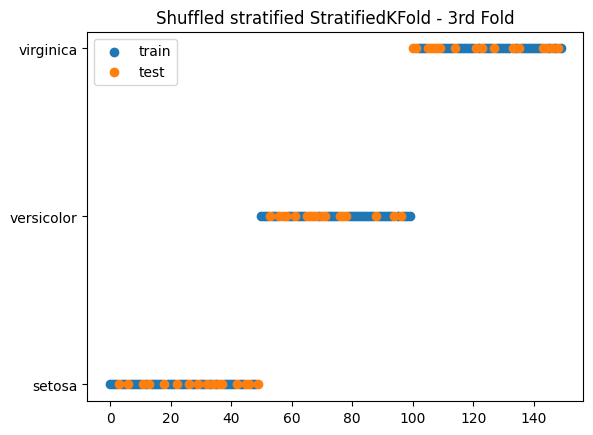

In [78]:
plt.scatter(x=y_train.index,y=iris_df.iloc[train_index].loc[:,'target_name'],label ="train")
plt.scatter(x=y_test.index,y=iris_df.iloc[test_index].loc[:,'target_name'], label = "test")
plt.legend()
plt.title("Shuffled stratified StratifiedKFold - 3rd Fold")
plt.show()

In [79]:
pd.concat(dfs,axis=1, sort=False)

,train 1,test 1,|,train 2,test 2,|,train 3,test 3,|
target_name,,,,,,,,,
virginica,34,16,|,33,17,|,33,17,|
setosa,33,17,|,33,17,|,34,16,|
versicolor,33,17,|,34,16,|,33,17,|


## Cross Validation without KFold
If you don't want to play with the split data, you don't have to do KFolds, cross_validate or cross_val_score will train using your data and prefered number of splits and give you the score on the testing set. 

In [80]:
# cross_validate allow to specify metrics which you want to see
for i, score in enumerate(cross_validate(model, X,y, cv=3)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.96
Accuracy for the fold no. 1 on the test set: 0.96
Accuracy for the fold no. 2 on the test set: 0.94


In [81]:
for i, score in enumerate(cross_val_score(model, X,y, cv=3)):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.96
Accuracy for the fold no. 1 on the test set: 0.96
Accuracy for the fold no. 2 on the test set: 0.94


## How are the input features distributed

In [82]:
# In order to have see how the KFold distributes the features let's have a look on titanic dataset
# https://www.kaggle.com/c/titanic
titanic = pd.read_csv(r'datasets/titanic.csv').sort_values(by="sex").reset_index(drop=True)
dfs = []
dfs_data = []

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
i = 1
for train_index, test_index in kf.split(titanic, titanic["survived"]):
    X_train = titanic.iloc[train_index].drop(columns=["survived"])
    X_test = titanic.iloc[test_index].drop(columns=["survived"])
    y_train = titanic.iloc[train_index].loc[:,"survived"]
    y_test = titanic.loc[test_index].loc[:,"survived"]
    
    dfs_data.append({"train": pd.concat([X_train,y_train], axis=1, sort=False), "test": pd.concat([X_test,y_test], axis=1, sort=False)})
    
    #Train the model
    #model.fit(X_train, y_train) #Training the model
    #print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}, doublecheck: {model.score(X_test,y_test)}")
       
    i += 1

Using StratifiedKFold we would expect to have the same ratio of Survivors and Victims in both the training and testing data set. Looking on the distribution and charts this expectation looks to be met. 

In [83]:
statistics = []
for i, data in enumerate(dfs_data):
    for st in ["train","test"]:
        s = data[st][["Survived"]].groupby(["Survived"]).size()
        s.index = s.index.map({0:"Died",1:"Survived"})
        s.name = f"{st} - {i+1}"
        statistics.append(s)

pd.concat(statistics, axis=1).reset_index()

KeyError: "None of [Index(['Survived'], dtype='object')] are in the [columns]"

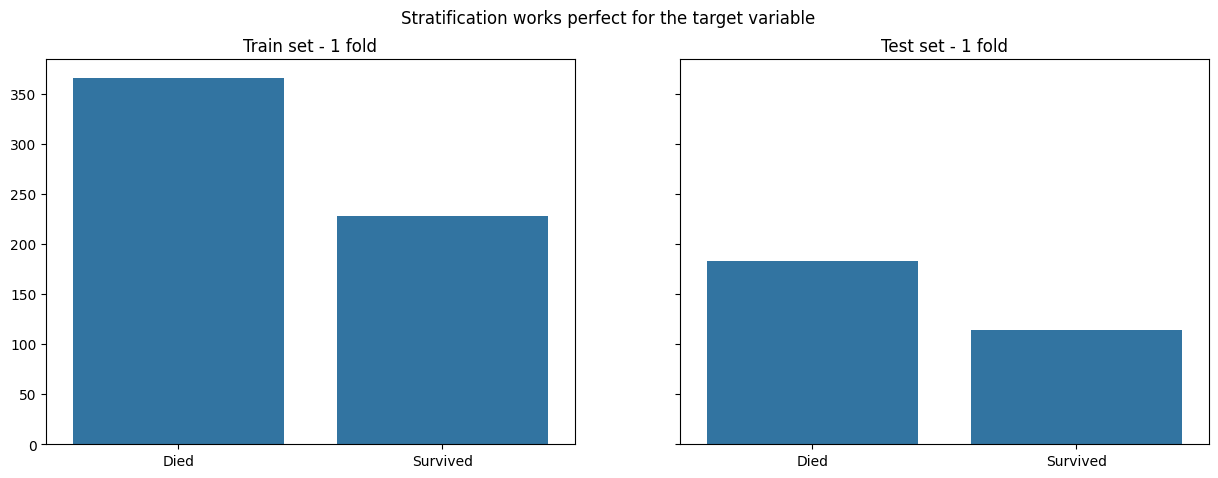

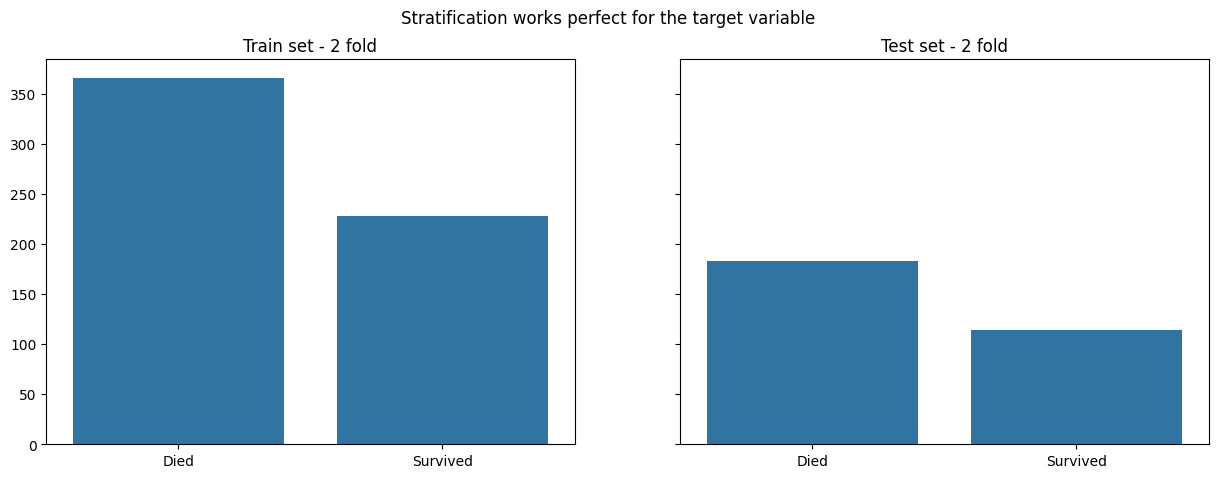

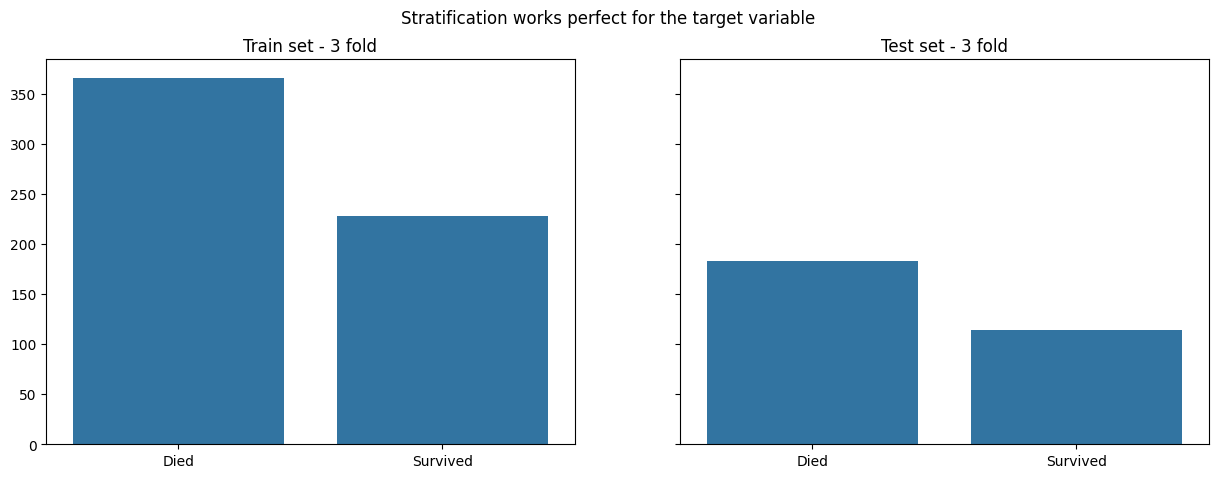

In [ ]:
for i, data in enumerate(dfs_data):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    
    # Train set plot
    plot_df = dfs_data[i]["train"][["survived"]].groupby(["survived"]).size()
    plot_df.index = plot_df.index.map({0: "Died", 1: "survived"})
    # Use x= and y= keyword arguments instead of positional arguments
    sns.barplot(x=plot_df.index, y=plot_df.values, ax=ax[0])
    ax[0].set_title(f"Train set - {i+1} fold")
    ax[0].set_xlabel('')
    
    # Test set plot
    plot_df = dfs_data[i]["test"][["survived"]].groupby(["survived"]).size()
    plot_df.index = plot_df.index.map({0: "Died", 1: "survived"})
    # Use x= and y= keyword arguments instead of positional arguments
    sns.barplot(x=plot_df.index, y=plot_df.values, ax=ax[1])
    ax[1].set_title(f"Test set - {i+1} fold")
    ax[1].set_xlabel('')
    
    plt.suptitle("Stratification works perfect for the target variable")
    plt.show()

However StratifiedKFold doens't look on the distribution of the input features at all. I've sorted the input by gender in order to demonstrate this `.sort_values(by="Sex")`. As you can see the ratio of genders in train and test set is not well correlated, which can be a problem, because Female had much higher changes to survive this catastrophe. If you test set contains mostly men, the model might expect much higher death rate. If the opposite, the model might become very optimistics. 

In [ ]:
# table showing distribution of the sexes in the StratifiedKFold split
metric_dfs = []
for i, data in enumerate(dfs_data):
    s = dfs_data[i]["train"].groupby("sex").size()
    s.name = f"Fold {i+1} Train"
    st = dfs_data[i]["test"].groupby("sex").size()
    st.name = f"Fold {i+1} Test"
    metric_df = pd.concat([s,st],axis=1)
    metric_df["|"] = "|"
    metric_dfs.append(metric_df)
pd.concat(metric_dfs,axis=1).reset_index()

,Sex,Fold 1 Train,Fold 1 Test,|,Fold 2 Train,Fold 2 Test,|,Fold 3 Train,Fold 3 Test,|
0,female,219,95,|,197,117,|,212,102,|
1,male,375,202,|,397,180,|,382,195,|


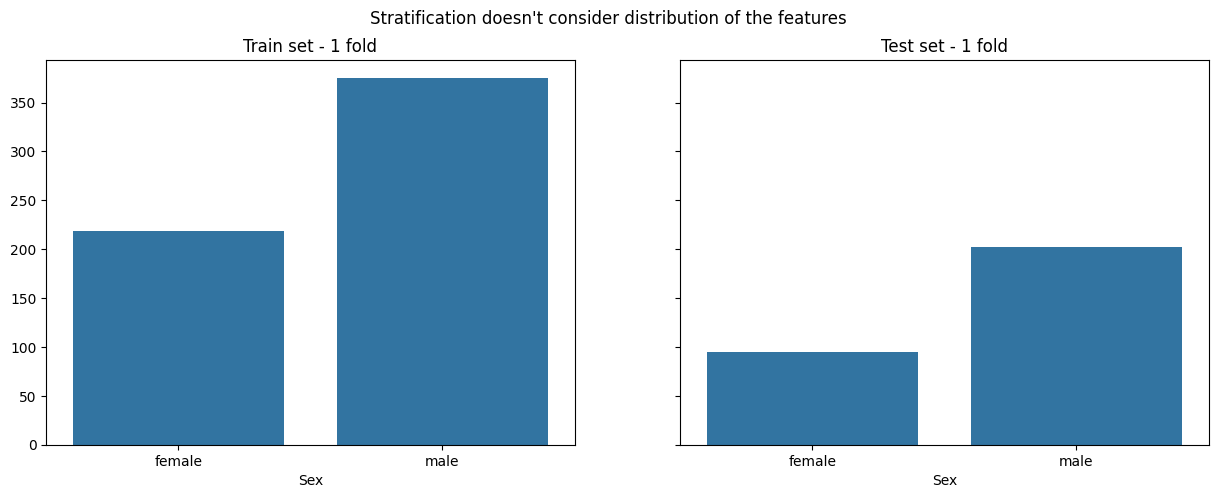

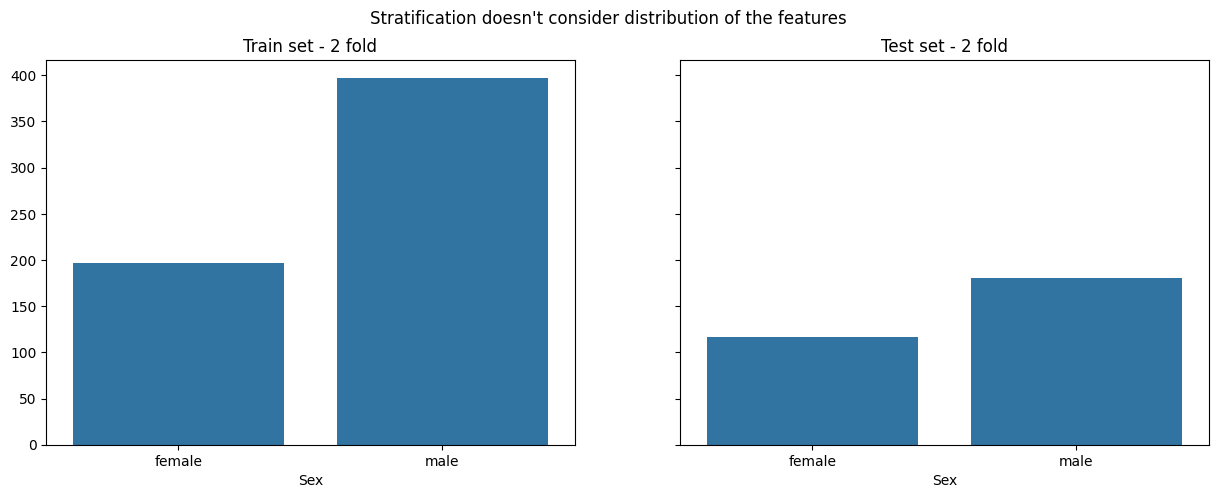

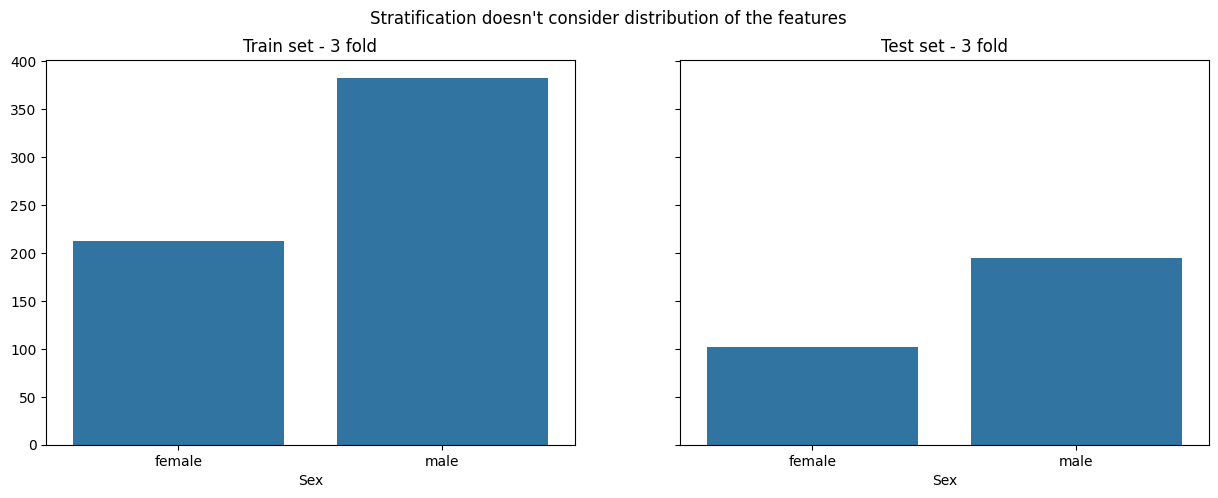

In [ ]:
for i, data in enumerate(dfs_data):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    
    # Train set plot
    plot_df = dfs_data[i]["train"][["sex"]].groupby(["sex"]).size()
    # Use x= and y= keyword arguments
    sns.barplot(x=plot_df.index, y=plot_df.values, ax=ax[0])
    ax[0].set_title(f"Train set - {i+1} fold")
    
    # Test set plot
    plot_df = dfs_data[i]["test"][["sex"]].groupby(["sex"]).size()
    # Use x= and y= keyword arguments
    sns.barplot(x=plot_df.index, y=plot_df.values, ax=ax[1])
    ax[1].set_title(f"Test set - {i+1} fold")
    
    plt.suptitle("Stratification doesn't consider distribution of the features")
    plt.show()

* In order to prepare an ideal distribution of the features is quite a complex task, especially if you are having a big number of features and you would like to train and test the model considering all major combination of the features. 

* We cannot look on how to solve feature balancing in this notebook, but if you had used shuffled StratifiedKFold the distribution would be better. You should be aware of this when building your model, but the good news is that cross-validation can help you identify that there's something wrong in case model's score differs significantly in some of the folds. 

## Lets explore other Cross-validation methods

### Repeated KFold

* Repeated K-Fold cross-validation is an extension of standard K-Fold cross-validation that adds an additional layer of robustness to model evaluation by performing multiple runs of K-Fold cross-validation using different randomization for each repetition.

* This provides a more reliable estimate of model performance by reducing the impact of random variations in training/testing splits.

* Working:

    - **Multiple Runs**: Instead of running K-Fold cross-validation just once, the process is repeated multiple times (n_repeats).
    - **Independent Shuffling**: For each repetition, the data is independently shuffled before being split into K folds.
    - **Comprehensive Evaluation**: This results in K × n_repeats total evaluations of the model.
    - **Aggregated Results**: Performance metrics from all runs are averaged to provide a more stable and reliable estimate of model performance.

* Key Benifits:

    - **More Stable Estimates**: By averaging over multiple runs, the performance estimate is less dependent on a particular random split.
    - **Reduced Variance**: The standard deviation of performance metrics is typically lower compared to a single run of K-Fold.
    - **Better Assessment of Model Stability**: Helps identify if model performance is highly dependent on specific data splits.
    - **More Data Utilization**: Each data point appears in different contexts across repetitions, maximizing information extraction from the dataset.

* Computational Considerations:

    * The main drawback of Repeated K-Fold is the increased computational cost. With n_repeats=R and n_splits=K, the model training and evaluation process must be performed R×K times. This can be prohibitively expensive for:

        - Large datasets
        - Complex models with long training times
        - Hyperparameter tuning scenarios (where cross-validation is nested within optimization)

* Repeated K-Fold is particularly useful in the following scenarios:

    - Small Datasets: When working with limited data, multiple evaluations provide more reliable performance estimates.
    - High-Variance Models: For models that are sensitive to data splits (e.g., decision trees, small neural networks).
    - Critical Applications: When precise performance estimation is crucial (e.g., medical diagnosis, financial risk models).
    - Model Comparison: When comparing multiple models and small differences in performance matter.

In [ ]:
from sklearn.model_selection import RepeatedKFold

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
krf42 = RepeatedKFold(n_splits=3, n_repeats=2, random_state=42)

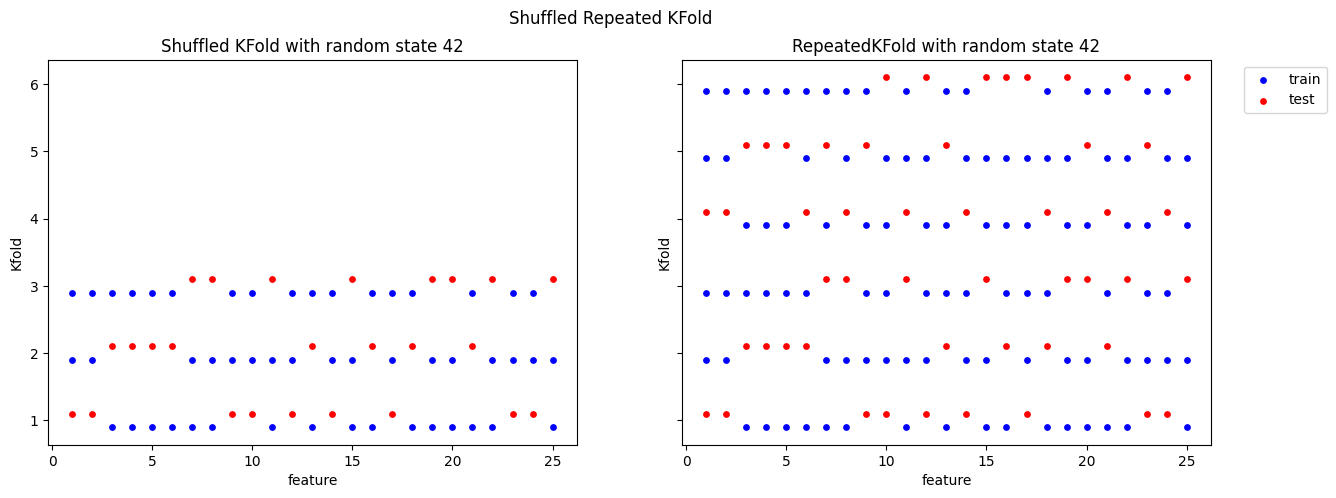

In [ ]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(krf42,rn)
#train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
#ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("RepeatedKFold with random state 42")
plt.suptitle("Shuffled Repeated KFold")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

RepeatedKFold is shufled per design. The first repeatition is the same like shuffled KFold having the same `random-state` and the next repetitions are creating yet another combination of the train-test split. 

### ShuffleSplit
https://scikit-learn.org/stable/modules/cross_validation.html#random-permutations-cross-validation-a-k-a-shuffle-split

* ShuffleSplit cross-validation is a technique used to evaluate the performance of machine learning models. It's particularly useful when you want to create a randomized train-test split multiple times. Unlike K-Fold cross-validation, which divides the data into distinct folds, ShuffleSplit creates random shuffles of the data for each split.

* Working:

    - **Shuffling the Data**: For each iteration, the dataset is randomly shuffled. This ensures that the training and testing sets are different for each split.

    - **Splitting into Train and Test Sets**: After shuffling, the data is split into a training set and a testing set according to the specified `test_size` or `train_size` parameter.

    - **Repeating the Process**: Steps 1 and 2 are repeated for the specified number of splits (`n_splits`). This generates multiple randomized train-test splits.

    - **Evaluating the Model**: The model is trained on the training set and evaluated on the testing set for each split.

    - **Averaging the Results**: The performance metrics (e.g., accuracy, F1-score) from each split are averaged to provide an overall estimate of the model's performance.

* Key Parameters:

    - n_splits: Number of re-shuffling & splitting iterations (default: 10)
    - test_size: Proportion of the dataset to include in the test split (default: 0.1)
    - train_size: Proportion of the dataset to include in the train split (default: complement of test_size)
    - random_state: Controls the randomization process for reproducibility

* Advantages of ShuffleSplit:

    - Flexibility: Control over train/test proportions beyond the constraints of K-Fold.
    - Variable Dataset Utilization: You can use different amounts of data for training in each iteration.
    - Speed: For large datasets, you can use a small number of splits with smaller samples to reduce computation time.
    - Random Sampling: Provides random subsampling that can reveal how models perform with different data subsets.
    - Efficiency: Can be more computationally efficient than K-Fold, especially for large datasets or when `n_splits` is relatively small.
    - Reduces Bias in Data Order: Since shuffling is done before every split, it helps eliminate order-based bias.
    - Allows for Multiple Splits: Unlike k-Fold, which ensures each sample appears in the test set exactly once, ShuffleSplit randomly samples different test sets across iterations.

* ShuffleSplit is particularly useful in the following scenarios:

    - Large Datasets: When using the full dataset for each fold is computationally expensive.
    - Exploring Data Sensitivity: To understand how model performance varies with different random subsets.
    - Monte Carlo Simulation: When you want to simulate the model's performance under different data conditions.
    - Custom Train/Test Ratios: When you need specific train/test proportions that don't fit neatly into K-Fold.

In [ ]:
from sklearn.model_selection import ShuffleSplit

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
ss = ShuffleSplit(n_splits=3, test_size=0.5, random_state=42)

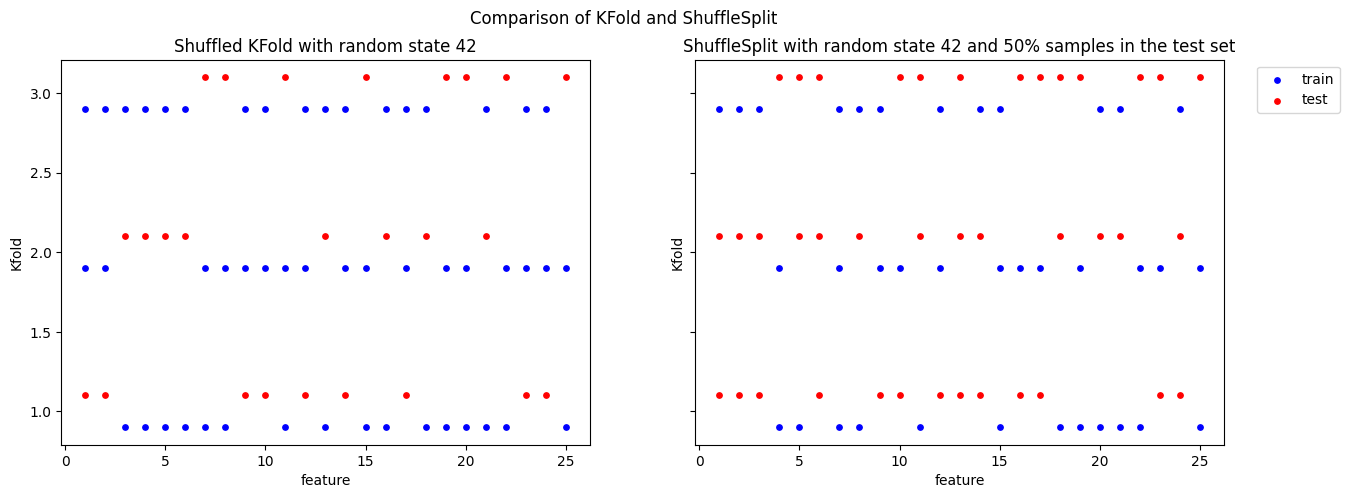

In [ ]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(ss,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("ShuffleSplit with random state 42 and 50% samples in the test set")
plt.suptitle("Comparison of KFold and ShuffleSplit")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

While KFold makes sure that each sample appears once in the test set, with ShuffleSplit you specify how many samples are in the test set. Stratified Shuffle Split would consider distribution of a taget variable. 

### Leave One Out

* Leave-One-Out (LOO) cross-validation is an exhaustive cross-validation technique used to evaluate the performance of machine learning models, particularly when dealing with limited datasets.

* It is an extreme form of K-Fold cross-validation where K equals the number of data points in the dataset. This means each data point gets a chance to be the single test sample while all other data points form the training set.

<div style="display: flex; justify-content: center;">
    <img src="leave-one-out.PNG" alt="Sample Image" width="700">
</div>


* Working:

    - Iterative Training and Testing: 
        - The model is trained and evaluated n times, where n is the total number of data points.
        - In each iteration, a single data point is held out as the test set, and the remaining n-1 data points are used as the training set.   
        - The model is trained on the n-1 training points and then tested on the single held-out point.  

    - Performance Evaluation: The performance metric (e.g., accuracy, error rate) is recorded for each iteration.   

    - Averaging the Results: The performance metrics from all iterations are averaged to provide an overall estimate of the model's performance.   

- Advantages of LOO Cross-Validation:

    - Maximum Training Data: In each iteration, the model is trained on almost the entire dataset, leading to a less biased estimate of model performance.
    - Reduced Overfitting: By using a large portion of the data for training, LOO can help reduce the risk of overfitting.
    - Deterministic: LOO doesn't involve random sampling, so the results are always the same for a given dataset.   

- Disadvantages of LOO Cross-Validation:

    - Computational Cost: Training the model n times can be computationally expensive, especially for large datasets.   

    - Potential for High Variance: Since each test set consists of only one data point, the performance estimates can have high variance.   

    - Not Ideal for Model Selection: LOO can be less effective for model selection or hyperparameter tuning because the high variance in performance estimates can make it difficult to distinguish between models.

- When to Use LOO Cross-Validation:

    - Very Small Datasets: When you have a small dataset and want to maximize the use of your data for training.
    - Cost: When computational cost is not a major concern.
    - Expensive Data Collection: When each data point is costly to obtain and must be utilized efficiently.
    - Stable Models: For models that aren't highly sensitive to small changes in the training data.
    - Model Selection: Can be useful for comparing different model types on small datasets.
    - When you need a deterministic evaluation method.

- Usecase: Imagine you have a dataset with 5 data points. LOO would perform the following:

    - Iteration 1: Train on points 2, 3, 4, and 5; test on point 1.
    - Iteration 2: Train on points 1, 3, 4, and 5; test on point 2.
    - Iteration 3: Train on points 1, 2, 4, and 5; test on point 3.
    - Iteration 4: Train on points 1, 2, 3, and 5; test on point 4.
    - Iteration 5: Train on points 1, 2, 3, and 4; test on point 5.

- The final performance estimate would be the average of the performance metrics from all 5 iterations.   


In [ ]:
from sklearn.model_selection import LeaveOneOut

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
loo = LeaveOneOut()

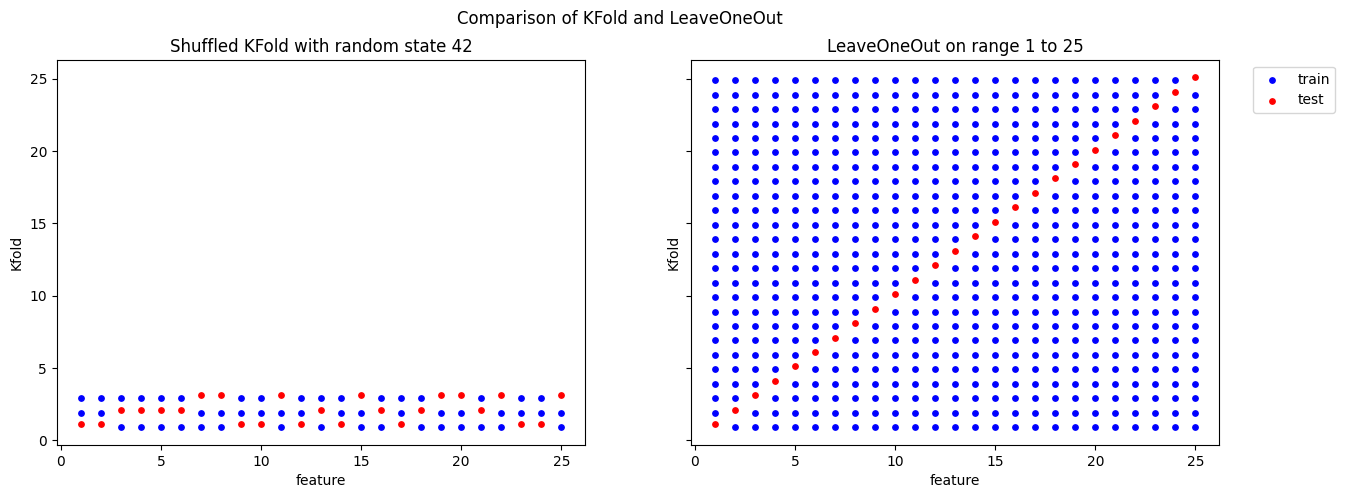

In [ ]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(loo,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
#ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("LeaveOneOut on range 1 to 25")
plt.suptitle("Comparison of KFold and LeaveOneOut")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Leave One Out does what it says, it leaves only a single observation as a test sample. 

Scikit documentation discuss this topics and suggest: "As a general rule, most authors, and empirical evidence, suggest that 5- or 10- fold cross validation should be preferred to LOO."
More info: https://scikit-learn.org/stable/modules/cross_validation.html#leave-one-out-loo


### Leave P Out
https://scikit-learn.org/stable/modules/cross_validation.html#leave-p-out-lpo

* Leave-P-Out Cross-Validation (LpOCV) is a variation of cross-validation where p samples are used as the validation set and the remaining n-p samples form the training set. This method creates all possible ways to divide the original dataset into a validation set of size p and a training set of size n-p.

* Working:

    - Generating Combinations: For a dataset with n samples, LpOCV creates C(n,p) different train-test splits (where C is the binomial coefficient).

    - Iterative Training and Testing:
        - For each combination:
            - The p data points in the combination are held out as the test set.   
            - The remaining n-p data points are used as the training set.  
            - The model is trained on the training set and then tested on the held-out test set.
    
    - Performance Evaluation: The performance metric (e.g., accuracy, error rate) is recorded for each iteration.

    - Averaging the Results: The performance metrics from all iterations are averaged to provide an overall estimate of the model's performance.

* Advantages:

    - Thorough Evaluation: Tests the model on every possible combination of p test samples.
    - Exploration of Different Test Set Sizes: LPO allows you to explore the effect of different test set sizes on the model's performance.
    - Flexible Test Size: Allows for a customized validation set size that's larger than one sample.
    - Deterministic: No randomness in how the data is split, ensuring reproducibility.
    - Robust Performance Estimate: Provides comprehensive insight into model performance across different data subsets.
    - Useful for Smaller Datasets: LPO can be particularly useful for smaller datasets where holding out a single point (as in LOO) might not be representative.

* Limitations:

    - Computationally Prohibitive: The number of splits grows combinatorially with dataset size, making it impractical for all but the smallest datasets.
    - Redundant Information: Many of the splits have significant overlap, creating highly correlated training sets.
    - Diminishing Returns: The improvement in performance estimation over simpler methods often doesn't justify the computational cost.
    - Memory Issues: Can cause memory problems when storing results for large numbers of splits.

* Due to its computational intensity, LpOCV is primarily suitable for:

    - Extremely Small Datasets: Typically fewer than 20 samples, where exhaustive validation is feasible.
    - Critical Applications: When the most thorough possible validation is required regardless of computational cost.
    - Algorithm Research: When investigating the theoretical properties of learning algorithms.
    Special Cases: When p=1, it becomes Leave-One-Out CV, which is more commonly used and implemented.

* Usecase: Let's say you have a dataset with 4 data points (A, B, C, and D) and you choose p = 2. LPO would perform the following:

    - Iteration 1: Train on C and D; test on A and B.
    - Iteration 2: Train on B and D; test on A and C.
    - Iteration 3: Train on B and C; test on A and D.
    - Iteration 4: Train on A and D; test on B and C.
    - Iteration 5: Train on A and C; test on B and D.
    - Iteration 6: Train on A and B; test on C and D.

* The final performance estimate would be the average of the performance metrics from all 6 iterations.
  



In [ ]:
from sklearn.model_selection import LeavePOut

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
lpo = LeavePOut(p=2)

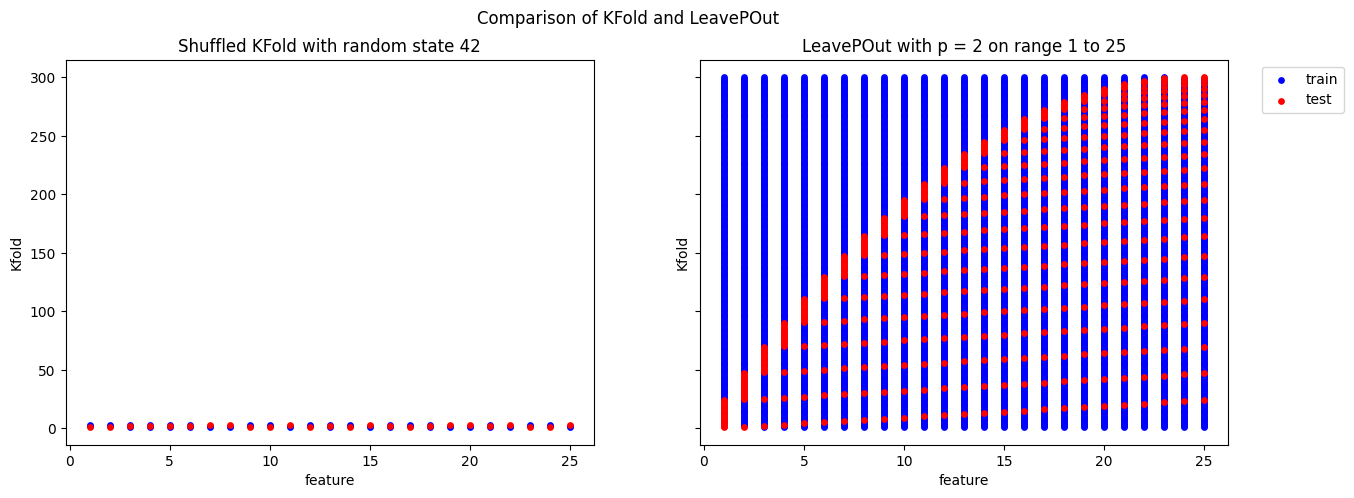

In [ ]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(lpo,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("LeavePOut with p = 2 on range 1 to 25")
plt.suptitle("Comparison of KFold and LeavePOut")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Leave P out creates ${n \choose p}$ combination, so in our example ${25 \choose 2} = 300$ 

# Conclusion
In this notebook we have reviewed how the Sklearn `Kfold` methods work. We see that it splits the data into the `n` number of sets. Each of the features will appear once in the test set and `n-1` times in the training set. You can also use `ShuffleSplit` or `RepeatedKFold` if you want to have different train-test distribtuion. 

In regular KFold the each fold will contain `1/n` values in the training set and `n-1/n` values in the testing set. So for `n=2` 50% will be in the test set, `n=3` 33%, `n=4` 25% etc. 

We can either split the data in order they appear using `shuffle=False` or randomly with `shuffle=True` and optionally stating a `random_state`. Having the same random state will always result in the same split of test and train data.

You don't need to split your data manually and can only apply `cross-validate` or `cross-val-score` methods. Data will be split on the background and you will receive the final score. 

Important concept is the StratifiedKFold which ensures that target variable ratio remains the same in train and in test set. That doesn't mean that the ratio of features would be the same. If one of the splits shows extraordinary low or high score it mean that the split can influence the model's results.